<a href="https://colab.research.google.com/github/kumardesappan/colab-notebooks/blob/main/tidlrt_tensor_debug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the x86_64 tools required for model compilation of given target release version


In [1]:
!wget https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
!tar -xzf tidl_tools.tar.gz
!rm tidl_tools.tar.gz

--2023-10-04 01:58:31--  https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
Resolving software-dl.ti.com (software-dl.ti.com)... 184.51.211.180, 2600:1407:3c00:d8f::b48, 2600:1407:3c00:d80::b48
Connecting to software-dl.ti.com (software-dl.ti.com)|184.51.211.180|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.ti.com/general/docs/licreg/anonymousproddownload.tsp?downloadPage=true&location=https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz [following]
--2023-10-04 01:58:31--  https://www.ti.com/general/docs/licreg/anonymousproddownload.tsp?downloadPage=true&location=https://software-dl.ti.com/jacinto7/esd/tidl-tools/09_00_00_02/TIDL_TOOLS/TDA4VM/tidl_tools.tar.gz
Resolving www.ti.com (www.ti.com)... 104.124.5.196, 2600:1407:a800:588::b48, 2600:1407:a800:5b1::b48
Connecting to www.ti.com (www.ti.com)|104.124.5.196|:443... connected.
HTTP re

# Downloading a sample model (renet18.onnx) and an image for testing

In [2]:
!wget https://akm-img-a-in.tosshub.com/indiatoday/images/story/201804/jet.jpeg
!wget https://git.ti.com/cgit/jacinto-ai/jacinto-ai-modelzoo/plain/models/vision/classification/imagenet1k/torchvision/resnet18_opset9.onnx
!mkdir /content/resnet18/
!mv jet.jpeg /content/resnet18/

--2023-10-04 01:58:40--  https://akm-img-a-in.tosshub.com/indiatoday/images/story/201804/jet.jpeg
Resolving akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)... 23.43.242.121, 23.43.242.147, 2600:1407:3c00:2c::1730:6349, ...
Connecting to akm-img-a-in.tosshub.com (akm-img-a-in.tosshub.com)|23.43.242.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30622 (30K) [image/jpeg]
Saving to: ‘jet.jpeg’

jet.jpeg            100%[===================>]  29.90K   167KB/s    in 0.2s    

2023-10-04 01:58:41 (167 KB/s) - ‘jet.jpeg’ saved [30622/30622]

--2023-10-04 01:58:41--  https://git.ti.com/cgit/jacinto-ai/jacinto-ai-modelzoo/plain/models/vision/classification/imagenet1k/torchvision/resnet18_opset9.onnx
Resolving git.ti.com (git.ti.com)... 198.47.28.207
Connecting to git.ti.com (git.ti.com)|198.47.28.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46808064 (45M) [application/octet-stream]
Saving to: ‘resnet18_opset9.onnx’

resnet18_ops

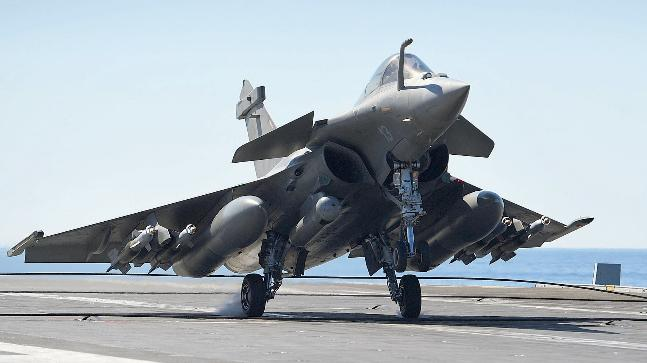

In [3]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/resnet18/*.jpeg'):
    display(Image(filename=imageName))

# Preparing configuration text files and list of inputs for quantization/calibration

In [4]:
!echo "perfSimConfig = /content/tidl_tools/device_config.cfg" >> /content/resnet18/config
!echo "/content/resnet18/jet.jpeg 895" >> /content/resnet18/in_data_list.txt

# Model import/compilation to generate artifacts for model inference on device

# Running inference of the imported model artefacts using PC Host emulation mode.
Here last number is index of the  detected object in the ImageNet [categories/labels](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for the given input image

895: 'warplane, military plane


In [7]:
!mkdir trace
!/content/tidl_tools/tidl_model_import.out /content/resnet18/config --modelType 2 \
--inputNetFile /content/resnet18_opset9.onnx --outputNetFile /content/resnet18/tidl_net.bin \
--outputParamsFile /content/resnet18/tidl_io_buff  --inDataNorm 1 \
--inMean 123.675 116.28 103.53  --inScale 0.017125 0.017507 0.017429 \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--tidlStatsTool /content/tidl_tools/PC_dsp_test_dl_algo.out \
--perfSimTool /content/tidl_tools/ti_cnnperfsim.out \
--graphVizTool /content/tidl_tools/tidl_graphVisualiser.out \
--inHeight 224 --inWidth 224 --inNumChannels 3 --numFrames 1 --numParamBits 32

!/content/tidl_tools/PC_dsp_test_dl_algo.out s:/content/resnet18/config \
--netBinFile /content/resnet18/tidl_net.bin \
--ioConfigFile /content/resnet18/tidl_io_buff1.bin \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--outData /content/resnet18/jet_tidl_out.bin --postProcType 1 --debugTraceLevel 1 --writeTraceLevel 3
!mv trace trace_float


Processing config file #0 : /content/resnet18/config 
Input : dataId=0, name=input.1_original, elementType 6, scale=1.000000, zero point=0, layout=0
Ouput : dataId=31, name=191, elementType 6, scale=1.000000, zero point=0, layout=0 
 worstCaseDelay for Pre-emption is 0.0000000 
 Freeing memory for user provided Net

 Instance created for  /content/resnet18/config
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . ..   0         1.00000         0.00000       253.00000 6
   1         1.00000         0.00000         4.10917 6
   2         1.00000         0.00000         4.10917 6
   3         1.00000         0.00000         1.71296 6
   4         1.00000        -3.43822         3.24240 6
   5         1.00000         0.00000         4.51391 6
   6         1.00000         0.00000         2.80557 6
   7         1.00000        -5.17378         3.38539 6
   8         1.00000         0.00000         5.11150 6
   9         1.00000         0.00000        

In [10]:
!mkdir trace
!/content/tidl_tools/tidl_model_import.out /content/resnet18/config --modelType 2 \
--inputNetFile /content/resnet18_opset9.onnx --outputNetFile /content/resnet18/tidl_net.bin \
--outputParamsFile /content/resnet18/tidl_io_buff  --inDataNorm 1 \
--inMean 123.675 116.28 103.53  --inScale 0.017125 0.017507 0.017429 \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--tidlStatsTool /content/tidl_tools/PC_dsp_test_dl_algo.out \
--perfSimTool /content/tidl_tools/ti_cnnperfsim.out \
--graphVizTool /content/tidl_tools/tidl_graphVisualiser.out \
--inHeight 224 --inWidth 224 --inNumChannels 3 --numFrames 1

!/content/tidl_tools/PC_dsp_test_dl_algo.out s:/content/resnet18/config \
--netBinFile /content/resnet18/tidl_net.bin \
--ioConfigFile /content/resnet18/tidl_io_buff1.bin \
--inData /content/resnet18/in_data_list.txt --inFileFormat 2 \
--outData /content/resnet18/jet_tidl_out.bin --postProcType 1 --debugTraceLevel 1 --writeTraceLevel 3

ONNX Model (Proto) File  : /content/resnet18_opset9.onnx  
TIDL Network File      : /content/resnet18/tidl_net.bin  
TIDL IO Info File      : /content/resnet18/tidl_io_buff  
Current ONNX OpSet Version   : 9  
Empty prototxt path, running calibration

~~~~~Running TIDL in PC emulation mode to collect Activations range for each layer~~~~~

Processing config file #0 : /content/resnet18/config.qunat_stats_config.txt 
 Freeing memory for user provided Net
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . .. T    6871.66  .... ..... ... .... .....
 
 
 *****************   Calibration iteration number 0 started ************************ 
 
 
 

~~~~~Running TIDL in PC emulation mode to collect Activations range for each layer~~~~~

Processing config file #0 : /content/resnet18/config.qunat_stats_config.txt 
 Freeing memory for user provided Net
 ----------------------- TIDL Process with REF_ONLY FLOW ------------------------

#    0 . .. T    4921.38 

In [16]:
import numpy as np
import argparse
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
import subprocess
import shutil

def save_error_plot(float_data, fixed_data, axes):
  mx = np.max(float_data)
  mn = np.min(float_data)
  org_diff = (fixed_data - float_data)
  combined = np.vstack((float_data, fixed_data, org_diff)).T
  # #np.savetxt("figs\\"+str(i).zfill(4)+"_float.txt", combined, fmt='%10.6f, %10.6f, %10.6f')
  abs_diff = abs(fixed_data - float_data)
  maxIndex = np.argmax(abs_diff)
  max_abs_diff = np.max(abs_diff)
  mean_abs_diff = np.mean(abs_diff)
  var_abs_diff = np.var(abs_diff)

  axes.hist(abs_diff, color='blue', edgecolor='black', bins=60)
  # image_txt = "mean = " + str(mean) +", Var = "+ str(var) +", MAx = "+ str(mx)
  image_txt = "MeanAbsDiff=%7.4f, MaxAbsDiff=%7.4f, MaxVal=%7.3f" % (mean_abs_diff, max_abs_diff, mx)
  #plt.title(image_txt)
  axes.set_title(image_txt, fontdict = {'fontsize' : 8})


def save_pc_ref_plot(float_output, fixed_output, axes):
  axes.set_title("Float output Vs Fixed Output : Plot 1")
  axes.set_xlabel('Float Output')
  axes.set_ylabel('Fixed Output')
  axes.plot(float_output, fixed_output, '.')

def save_pc_ref_plot2(float_output, fixed_output, axes):
  axes.set_title("Float output Vs Fixed Output : Plot 2")
  axes.plot(float_output, "bs", label = "Float")
  axes.plot(fixed_output, "c.", label = "Fixed")
  axes.legend(loc='upper right', frameon=True)

def compare_tensor_files(file_path_float, file_path_fixed, plot_name):
  fileHandle = open(file_path_float, 'rb')
  fixed_data = np.fromfile(fileHandle, dtype=np.float32)
  fileHandle.close()
  fileHandle = open(file_path_fixed, 'rb')
  float_data = np.fromfile(fileHandle, dtype=np.float32)
  fileHandle.close()
  fig = plt.figure(figsize=(10, 10))
  axes1 = plt.subplot2grid((16, 16), (0, 0), rowspan=6, colspan=7)
  axes2 = plt.subplot2grid((16, 16), (0, 8), rowspan=6, colspan=8)
  axes3 = plt.subplot2grid((16, 16), (8, 0), rowspan=8, colspan=16)
  save_error_plot(float_data, fixed_data, axes1)
  save_pc_ref_plot(float_data, fixed_data, axes2)
  save_pc_ref_plot2(float_data, fixed_data, axes3)
  plt.savefig(plot_name)
  plt.clf()
  plt.close(fig)



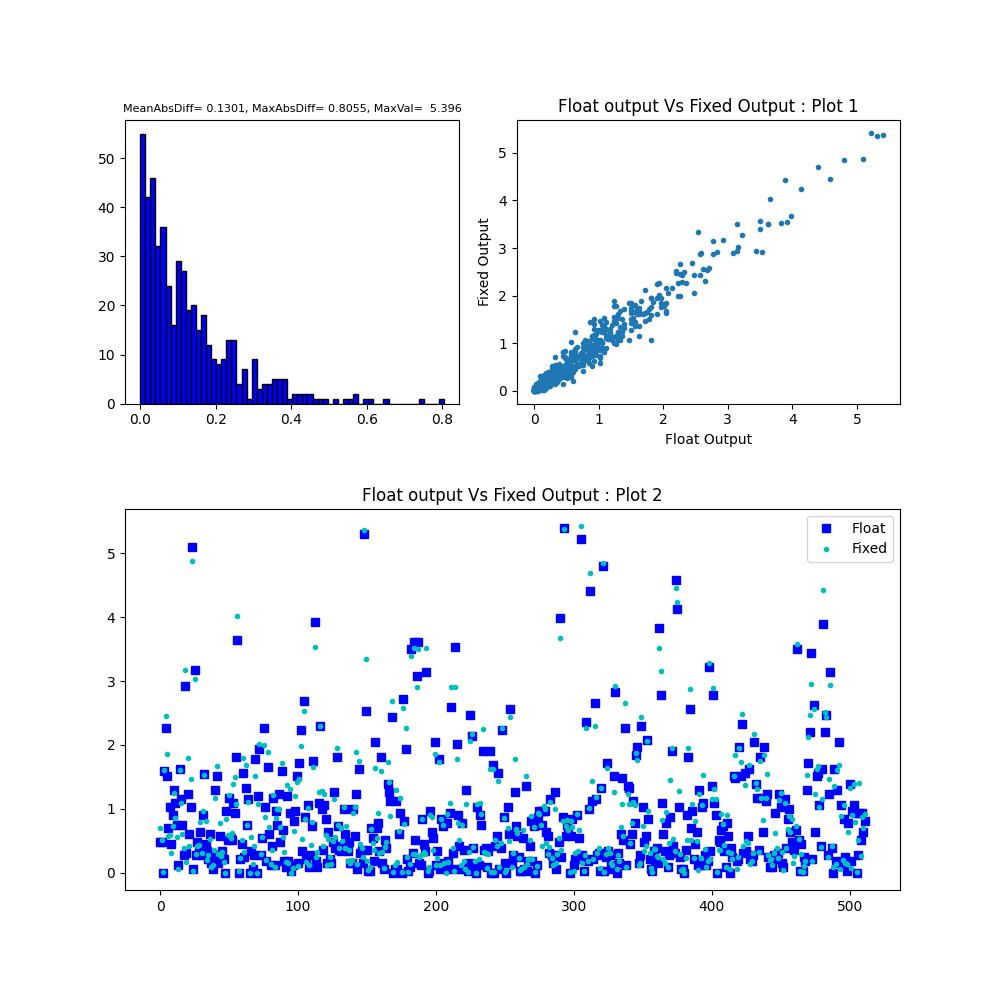

In [17]:
imageName="dataid_30.png"
compare_tensor_files("/content/trace_float/config_0030_00001_00001_00512x00001_float.bin","/content/trace/config_0030_00001_00001_00512x00001_float.bin", imageName)
display(Image(filename=imageName))

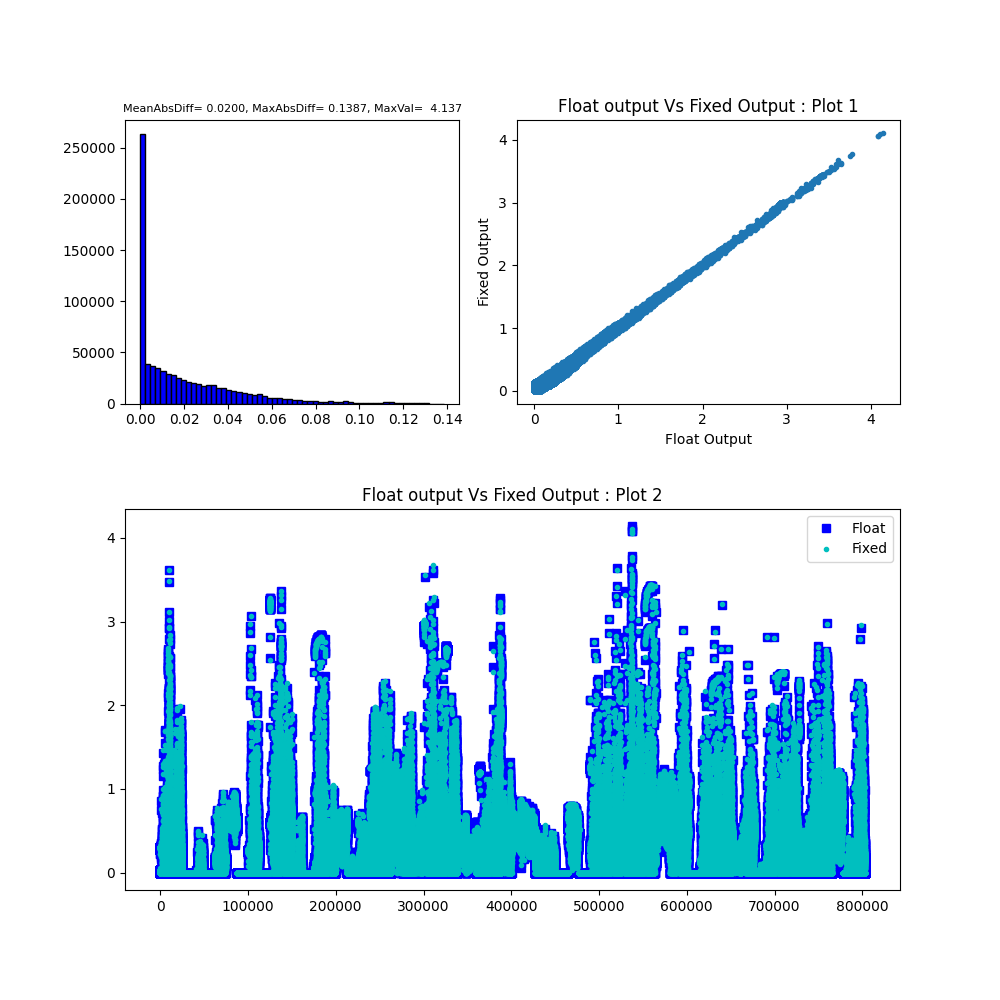

In [18]:
imageName="dataid_1.png"
compare_tensor_files("/content/trace_float/config_0001_00001_00064_00112x00112_float.bin","/content/trace/config_0001_00001_00064_00112x00112_float.bin", imageName)
display(Image(filename=imageName))